# Model validation altimetry

Note: this notebook requires the model output data

In [1]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h
import mikeio

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

save_png = False if "sample" in mr_fldr else True

In [3]:
altlist = h.get_altimetry_obs(quality=None)

c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\timeseries\_track.py:136: UserWarning: Removed 1 duplicate timestamps with keep=first
  warnings.warn(


In [5]:
mr = ms.DfsuModelResult(mikeio.read(mr_fn)[0], name="MIKE21")
mr

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: Surface Elevation [m]

In [6]:
cmps = []
match_t = "2023" # You can choose a specific time period here
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time=match_t), mod=mr) 
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3a...
Processing 3b...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing 6a...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing c2...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing j3...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing sa...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


In [7]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,14868,-0.0,0.1473,0.1473,0.1106,0.9867,0.2489,0.9659
3b,15697,0.0,0.1419,0.1419,0.1086,0.9896,0.2264,0.9723
6a,19484,-0.0,0.1305,0.1305,0.0994,0.9882,0.2214,0.9729
c2,15728,-0.0,0.1482,0.1482,0.1108,0.9866,0.2370,0.9677
j3,18062,-0.0,0.1300,0.1300,0.0987,0.9872,0.2317,0.9700
sa,13248,-0.0,0.1367,0.1367,0.1026,0.9878,0.2284,0.9705


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(


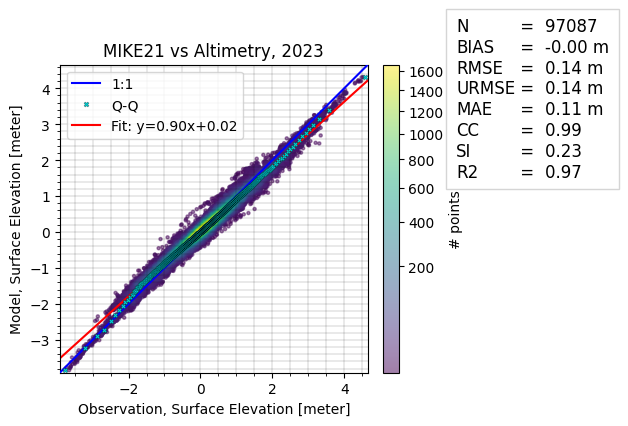

In [8]:
cc.plot.scatter(skill_table=True, figsize=(5,4));
plt.title("MIKE21 vs Altimetry, "+match_t)
if save_png: plt.savefig("../figures/altimetry_comparison.png", bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(-(-len(cc)//2), 2, figsize=(8,len(cc)*2))
axs = axs.flatten()
for i in range(len(cc)):
    cc[i].sel().plot.scatter(ax=axs[i])

if len(cc) % 2 != 0:
    axs[-1].axis("off")
plt.tight_layout()
plt.show()